# Assignment 2 Notebook 

## Oscar Chivers, 190012624

GitHub username: OscarChivers

GitHub URL: https://github.com/OscarChivers/UA_Assignment2

Google Drive for data: https://drive.google.com/drive/folders/1SMQjhjH-2chehDADQlYBpLuzcuDZZNaI?usp=sharing


The data that is needed for the lab has been uploaded to the GitHub repo, but it has also been put in a google drive. If you choose to use the data from the GitHub, if you put the data in a folder called 'data', then you should not need to change the file paths in the workboom. If you choose to download the data with the google drive, please click on the google drive link, and all the data needed for this lab is in there. You will need to download them to a file and then run the code. You may have to change the paths when calling the files but if you put the data in a file with the following path 'data' then you should not need to do this. 

Some of the maps that are coded do not come up in the printed version. However when you run the code they will appear. Regardless, the maps that are the final maps are all pasted as images so they will be present.

# Lab 5 Challenges

## Challenge 1

It's time for you to apply everything you learned by analyzing a case study of GitHub's collaborator network data.

- **Data**: `github_users.p` (avaliable in Moodle)

> This dataset is a GitHub user collaboration network. As you already know, GitHub is a social coding site where users can collaborate on code repositories. In this network, nodes are users, and edges indicate that two users are collaborators on at least one GitHub repository.

1. Read the GitHub network dataset.
2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network
3. Calculate the **degree centrality** of the GitHub collaboration network G. Using the .values() method of the network (e.g. G), extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the network.
4. Make a subset of the initial network (e.g. Gh_sub), where you include at least five nodes and their corresponding edges. Experiment with multiple nodes so you have a graph with enough edges to work on.
5. Plot the subset graph created.
6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`
7. Plot the Matrix, Arc and Circos from the subset.

Now I am going to load in the GitHub network dataset from the folder in moodle. 

1. Read the GitHub network dataset.
2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network

In [ ]:
#importing packages
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import nxviz as nv

In [ ]:
import pickle

with open('data/github_users.p', 'rb') as f:
    Gh = pickle.load(f)
Gh

In [ ]:
print(len(Gh))
print(type(Gh.nodes())) # Tells you the type of `T.nodes()`
print(list(Gh.edges(data=True))[-1]) # Read the attributes associated with the last element of the edges list. 
print(list(Gh.nodes(data=True))[0]) # Read the attributes associated with the firts element of the node list.
print(type(list(Gh.edges(data=True))[-1][2])) # Wich type; therefore, you can see what you are reading.

It seems as though there are no attributes for what attributes are associated with the edges, however there is an attribute associated with nodes which is 'bipartite'

In [ ]:
Gh.number_of_edges()

In [ ]:
Gh.number_of_nodes()

In this graph, there are 56,519 nodes and 72900 edges between nodes. 

In [ ]:
#list(Gh.degree)
#list(Gh.adj)
#list(Gh.edges(data=True))
#list(Gh.nodes(data=True))

The above cell confirms that there are many different connections between nodes and edges, but there are no distinguishable charecteristecs to select nodes by as they all have the same attribute. Therefore I am going to select nodes and corresponding edges by nbunch rather than list comprehensions, however first I am going to work out the degree centrality. 

**Degree Centrality**

3. Calculate the **degree centrality** of the GitHub collaboration network G. Using the .values() method of the network (e.g. G), extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the network.


I am going to use the degree_centrality function in nx, and then make a list of the degree_centrality to values to find out how connected they are to other nodes. 

In [ ]:
degree_centrality = nx.degree_centrality(Gh)
list(degree_centrality.values())

Now I am going to plot a histogram to show the distribution of node degree connectivity in the graph.

In [ ]:
plt.hist(list(degree_centrality.values()))
plt.show()

The histogram above shows that most of the points are not important in terms of having a high number of degree centrality. In the case of git hub users it suggests that most users only interact with their own circle of other users and collaborate in smaller circles. However therea re a few counts where there are larger values of degree centrality, meaning that there are some GitHub accounts that many users collaborate with, these could be educational account or accounts that are the heads of large businesses with a lot of git hub users collaborating on that account.

4. Make a subset of the initial network (e.g. Gh_sub), where you include at least five nodes and their corresponding edges. Experiment with multiple nodes so you have a graph with enough edges to work on.

Now I am going to make a subset of the initial network (e.g. Gh_sub), where you include at least five nodes and their corresponding edges. To do this I am going to use the command nbunch 

In [ ]:
#edges from Gh - where the numbers specify the nodes i want to subset 
edges_from_Gh=Gh.edges(["u2","u6","u53","u18","u7"])
edges_from_Gh
#I am now going to make this list into a subset graph and see how many edges there are

Creating an empty graph, which I can then assign the selected nodes and corresponding edges to.

5. Plot the subset graph created.

In [ ]:
Gh_sub = nx.DiGraph()
len(Gh_sub)

In [ ]:
Gh_sub.add_edges_from(edges_from_Gh) #Adding the list from the subset of nodes.
len(Gh_sub)

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(Gh_sub, with_labels=True)
plt.show()

This graph is nice, because it shows there are some nodes which have many corresponding edges, such as u53, this suggests that u53, u7, u6 collaborate with a large number of other GitHub users, or u18, who only collaborate with a few other users, or u2, who only collaborate with one other user. 

**Betweeness centrality**

6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`
7. Plot the Matrix, Arc and Circos from the subset.

In [ ]:
b_centrality = nx.betweenness_centrality(Gh_sub)
list(b_centrality.values())

In [ ]:
plt.hist(list(b_centrality.values()))
plt.show()

There is little that can be shown from this graph, this is becuause, there are a huge amount of github users and a lot of the time they collaborate with users from a small circle, therefore it was tricky to find a group of users where there was one key user whom many others collaborated. The histogram shows that there is one user who connects a couple of other users with the value of 0.0010

Plotting the Matrix, Arc and Circos from the subset.

In [ ]:
nv.MatrixPlot(Gh_sub)
plt.show()

In [ ]:
nv.ArcPlot(Gh_sub)
plt.show()

In [ ]:
nv.CircosPlot(Gh_sub)
plt.show()

Thes plot shows that each node is connected to a variety of different nodes through the edges, it also shows that many of these nodes do not overlap (through the different vertical sections on the matrix plot), although it suggests that there are a some nodes which have edges between 2 or more other nodes (shown in both the arc plot and the circos plot with some edges going back to a node that has already been in the plot). 

## Challenge 2

This challenge is about OSMnx. You will explore and analyze a city's street network using the OSMnx Python library.

1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.
2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.
3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot
4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.
5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.
6. Create the figure-groud from the selected city
7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.
8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.
9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

First I am going to install all of the necessary packages for this challenge

In [ ]:
#pip install osmnx

In [ ]:
import osmnx as ox

In [ ]:
ox.__version__

In [ ]:
#installing other packages:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings('ignore')

import networkx as nx

import matplotlib.pyplot as plt

from IPython.display import Image

I am going to try and download data regardng Cambridge, in the UK and I am going to search for it using its city name:

In [ ]:
Cambs = ox.graph_from_place("Cambridge, UK", network_type="drive")

fig, ax = ox.plot_graph(Cambs, node_size=0, edge_linewidth=0.5)

2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.

Next, I am going to calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc. To do this I will use many of the basic functions that we learnt in the first part of this lab.

In [ ]:
type(Cambs)

In [ ]:
Cambs.number_of_edges()

In [ ]:
Cambs.number_of_nodes()

In this graph, there are 3257 nodes and 7168 edges between nodes. 

Therefore on average, there are 2.2 edges per node. (7168/3257)

The next code cell is hashed, becuase there are huge outputs created, but please have a look through them, they show information such as the number of edges each node has, and the metadata that is assigned to each node. The metadata is listed below if you do not wish to run the code. 

In [ ]:
#(Cambs.degree)
#list(Cambs.edges(data=True))
#list(Cambs.nodes(data=True))

Metadata for edges: 
* 'osmid' - I am assuming the ID associated with OS maps
* 'name' - name of street
* 'highway'
* 'maxspeed'
* 'oneway' - boolean
* 'reversed' - boolean
* 'length'
* 'width'
* 'geometry
* 'bridge'

Metadata for nodes: 
* x
* y
* street_count
* highway

In [ ]:
# What sized area does our network cover in square meters?
warnings.filterwarnings('ignore')
Cambs_proj = ox.project_graph(Cambs)
nodes_proj = ox.graph_to_gdfs(Cambs_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

The graph covers as total 43.5 million square metres, this is the equivelant to 43.5 square kilometres. 

In [ ]:
# show some basic stats about the network
ox.basic_stats(Cambs_proj, area=graph_area_m, clean_int_tol=15)

Some interesting statistics are shown in this code: 
* such as the fact that there are some nodes that are part of a self loop, but only very few since the proportion is very small.
* Most nodes either have 1 or 3 streets coming off it.
* There are 74 nodes per square km.

3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot

In [ ]:
ox.plot.plot_graph(Cambs, ax=None, figsize=(8, 8), bgcolor='black', node_color='green', node_size=8, node_alpha=0.7, node_edgecolor='none', node_zorder=1,
                      edge_color='gray', edge_linewidth=1.4, edge_alpha=None, show=True)

4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.

I am going to look at the different nodes of Cambridge with the data on, so that I can see the lats and longs of each node, from this, I will select two points to calculate that shortest distance route.  

In [ ]:
#list(Cambs.nodes(data=True))

#this code again produces a very long list, so you can run it if you wish.

I am going to selected node #6550180 'y': 52.2345959, 'x': 0.1288634 as origin and node #20823806 'y': 52.2047042, 'x': 0.1323713 as destination. 

The following code cell assigns the nodes that are closest to these latitude longitude pairs. Since I had got the lat/longs directly from a node in the dataset, I tried to input them straight into the code that was actually calculating the shortest path, but it didnt work, I think maybe due to errors in rounding in the list code. Therefore I selected nodes that were closest to these longitudes and latitudes. THe following code calculates the shortest route, which is according to travel_time and plots it in red on the map. 

In [ ]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(Cambs, X=0.1288634, Y=52.2345959)
dest = ox.distance.nearest_nodes(Cambs, X=0.1323713, Y=52.2047042)

In [ ]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(Cambs, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(Cambs, route, node_size=0)

5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.

In the following code, I am going to calculate the degree centrality and betweenness centrality for the nodes in the street network of Cambridge, I will then plot histograms to display the distrubution of these measures. Later in the challenge (q.7) I will map the betweeness centrality of the street network. 

**Degree Centrality:** 

In [ ]:
degree_centrality = nx.degree_centrality(Cambs)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

plt.hist(list(degree_centrality.values()))
ax.set_title("Degree Centrality for Cambridge street network", size=15)

plt.show()

The degree centrality histogram shows that there is not a normal distribution of node degrees in the graph. There are some nodes connected to a large number of edges, shown by the high count of the bin just under 0.0020. However there are also a large number of nodes with very feew connected edges, shown by the smaller count of the bin with the lowest value. 

**Betweenness Centrality**

In [ ]:
b_centrality = nx.betweenness_centrality(Cambs)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

plt.hist(b_centrality.values(), bins = 20)
ax.set_title("Betweenness Centrality for Cambridge street network", size=15)

plt.show()

The histogram for betweeness centrality shows that there are a large number of nodes that are not in the centre of shortest path networks, and that there are few nodes which are highly connected to other nodes and play a part in connecting the nodes which are less connected. 

6. Create the figure-groud from the selected city

I have created a square-mile, figure-ground from Cambridge, including all network types to show walkways too, the roads are shown in thicker lines and then the residential walkways are thinner.

In [ ]:
# configure the inline image display so that the image will save to a file 
img_folder = "images"
extension = "png"
size = 240
dpi = 40

In [ ]:
place = "Cambridge, UK"
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    address=place,
    network_type="all",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.

The maps will show when you run the code, but in this markdown cell there are images attached of each interactive map. 

Just Edges: 
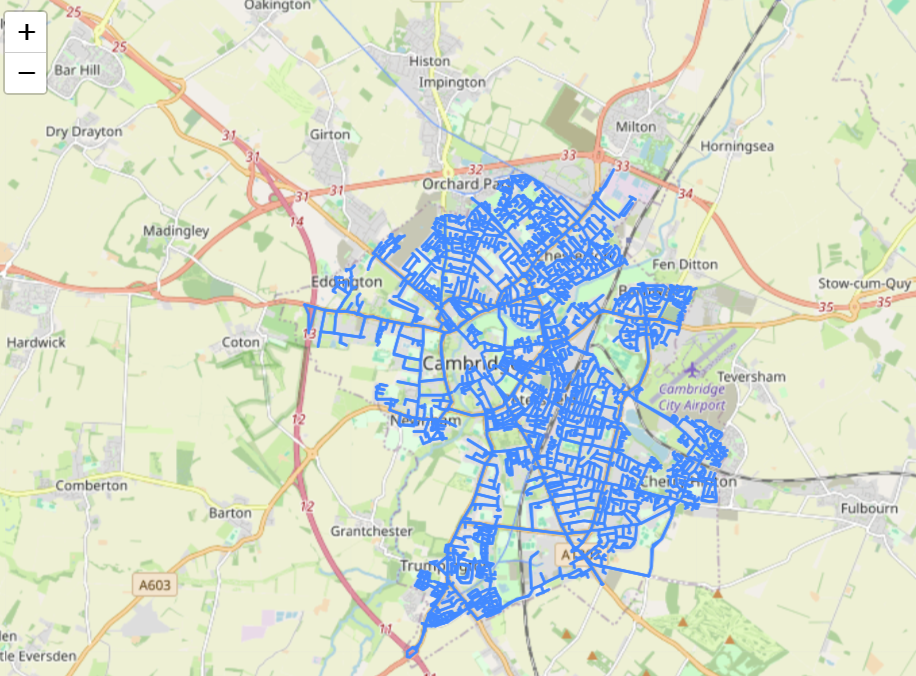

Just Nodes: 
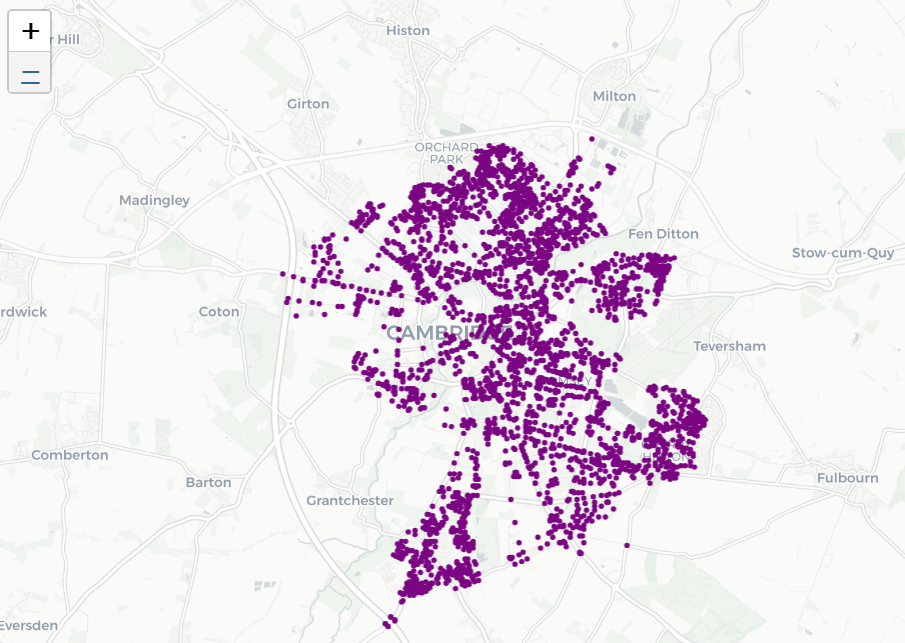

Nodes and Edges: 
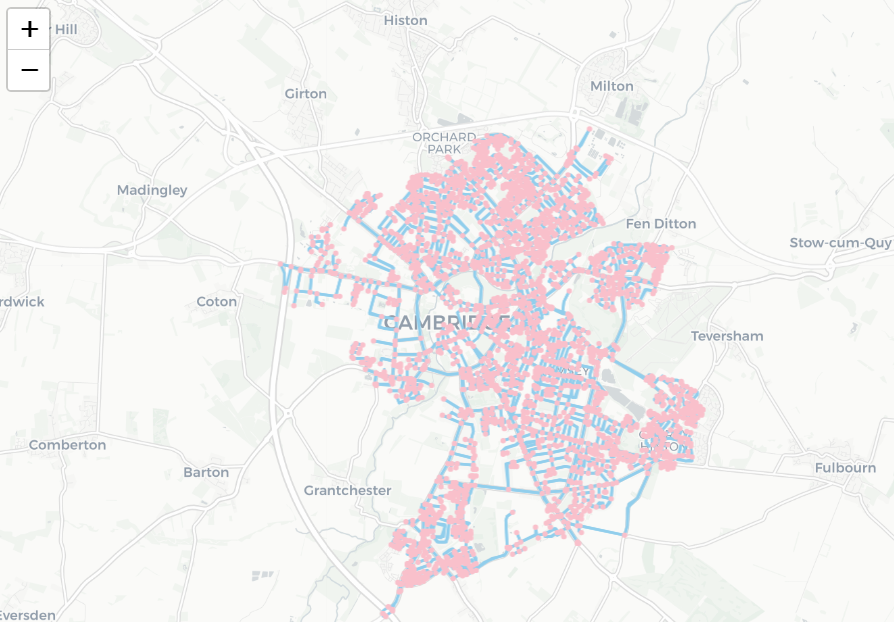

Betweeness centrality of nodes: 
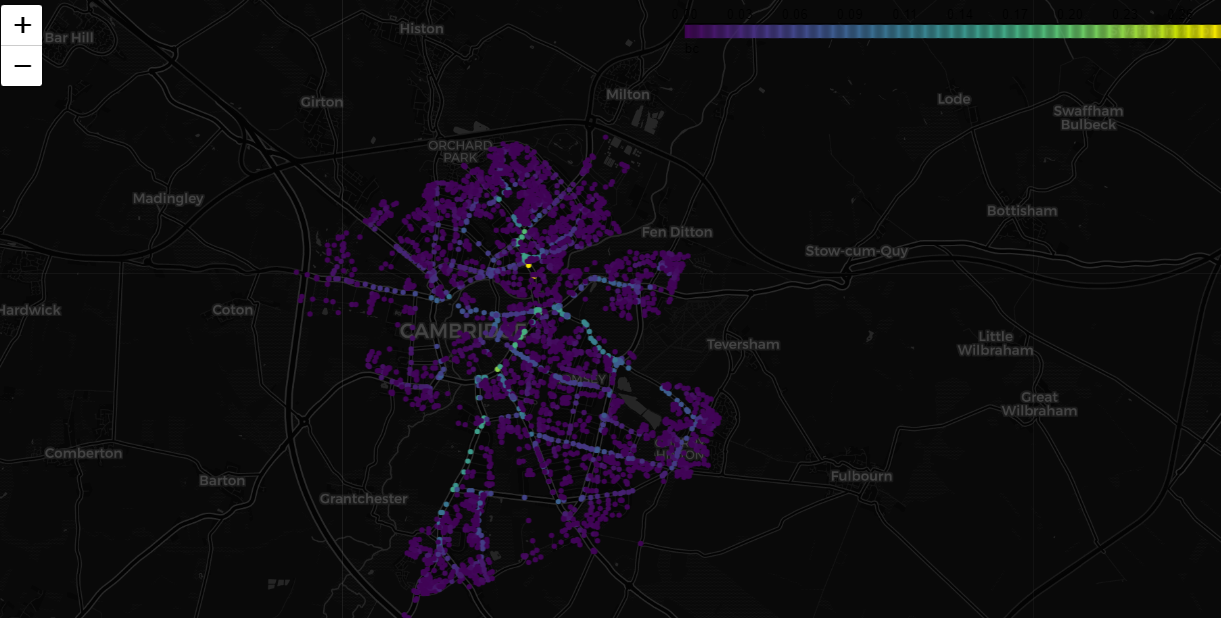

In [ ]:
#this is a simple plot which neatly shows just the edges, there are also stats about the edges if you hover the mouse over them
ox.graph_to_gdfs(Cambs, nodes=False).explore()

The following map shows only the nodes, there is more information about each of the nodes, such as the number of streets that are coming off it if you hover your mouse over the node. 

In [ ]:
nodes = ox.graph_to_gdfs(Cambs, edges=False)
nodes.explore(tiles="cartodbpositron", marker_kwds={"radius": 1}, color='purple')

The following code prints an explore map where you can explore both nodes and edges in the map together. 

In [ ]:
# explore nodes and edges together in a single map
nodes, edges = ox.graph_to_gdfs(Cambs)
m = edges.explore(color="skyblue", tiles="cartodbpositron")
nodes.explore(m=m, color="pink", marker_kwds={"radius": 0.5})

The next map shows the betweeness centrality of each node, it, like the histogram shown earlier shows that most of the nodes are not that important in terms of the whole graph. The nodes with the highest betweeness centrality are those which are on the main roads. This shows that these are the most important nodes and are often used when travelling from one place to another. 

**NOTE**

This code takes a long time to run, it works and you can run it if you want to check it is the same as the image of the map. To do so, unhash the lines of code in the cell and then run it. 

In [ ]:
#nx.set_node_attributes(Cambs, nx.betweenness_centrality(Cambs, weight="length"), name="bc")
#nodes = ox.graph_to_gdfs(Cambs, edges=False)
#nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 0.75})

8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.

In [ ]:
ox.io.save_graph_geopackage(Cambs, filepath="./data/Cambs_network.gpkg", encoding='utf-8', directed=False)

In [ ]:
import geopandas as gpd

gdf = gpd.read_file("data/Cambs_network.gpkg")
gdf.head()

It has only loaded the nodes, so I am trying to load the nodes and edges as two different layers. I know that they have both been exported becuase I have checked on QGIS and they are both there. 

In [ ]:
nodes = gpd.read_file("data/Cambs_network.gpkg", layer='nodes')

In [ ]:
edges = gpd.read_file("data/Cambs_network.gpkg", layer='edges')

In [ ]:
nodes.head()

In [ ]:
edges.head()

I am now going to plot the edges only in an interactive map like the one that was shown in question 7. I am going to show the different lengths of edges in the graph.

In [ ]:
edges.explore('length', cmap="viridis", tiles="cartodbdarkmatter")

9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

First, I am going to plot the footprints of the buildings, and then I will try and plot some attribute, such as the parks. 

In [ ]:
place = "Cambridge, UK"
tags = {'building': True}
gdf = ox.features_from_place(place, tags=tags)
gdf.shape

In [ ]:
warnings.simplefilter('ignore', DeprecationWarning)

fig, ax = ox.plot_footprints(gdf, figsize=(12, 10))

The plot above neatly shows the different building footprints around Cambridge, there are many different small urban areas where houses can be seen in the periphery of the city, and then there are other areas where there are bigger building footprints that may be big apartment blocks in the city centre or shopping centres.

I am now going to map the parks in Cambridge, to see how much greenspace there is in the city. 

In [ ]:
tags = {"leisure": "park"}
gdf_park = ox.features_from_place(place, tags)
gdf_park.shape

In [ ]:
warnings.simplefilter('ignore', DeprecationWarning)

fig, ax = ox.plot_footprints(gdf_park, figsize=(12, 10))

This map shows that there are quite a large number of recreational areas in Cambridge which is good. It means that there is plenty of areas for people to exercise and spend time outdoors. This means they will have opportunities to have better mental and phyical health.

# Lab 6 Challenges

## Challenge 1

In this chall
enge, you will replicate the process of creating a geodemographic classification using the k-means clustering algorithm. Please select any city in the UK except London, Liverpool, or Glasgow. The main goal is to generate a meaningful and informative classification that captures the diversity of areas in your dataset using the census data ( For England, you can try to use the 2021 or 2011 census, and for Scotland, you need to use the 2011 census data) 

1. Define the main goal for the geodemographic classification (marketing, retail and service planning). 
2. Look for census data from the selected city for which you would like to generate the geodemographic classification.
3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 
4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.
5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.
6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.
7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.
8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.
9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?
10. Map the final cluster groups
11. Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.
12. Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal.

1. Define the main goal for the geodemographic classification (marketing, retail and service planning).
2. Look for census data from the selected city for which you would like to generate the geodemographic classification.

Geodemographic classification is a method of grouping geogrpahical neighbourhoods that are based on similar characteristics. They can be used for marketing so that different companies may know more about where their proudcts should be placed. Such as young adults who may be thinkning about having children, geodemographic classification can show that there are more people living in these areas therefore marketing and retail should be placed more in these areas. Or if there are areas that have more old people, who tend to require more healthcare services, geodemographic classification can help show areas that may be of importance 

In my geodemographic classification, I will try and how socio-deomgraphic and economic factors are shown in different classifications in Edinburgh. It will focus on the different education, economic and housing characteristics are classified in Edinburgh. This will be useful as it may help with service allocation, such as providing increasing funding to schools or hospitals in a certain area. It may also help to determine demographics of certain areas like the life stages of people and this will help with marketing products to certain demographies - such as those who may be looking to purchase a house, or even those who are looking to have children. 

### Select and load topics 

3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 

These are the following topics that I think will be useful for the my geodemographic classification. 

* KS102SC - Age structure - Demographics 
* QS104SC - Sex - Demographics 
* QS501SC - Highest level of qualification - Education 
* QS302SC - General Health - Health 
* QS301SCb - Provision of unpaid care - Health/Economic
* KS601SC - Economic activity - Economic 
* KS604SCa - Hours worked - Economic
* QS703SC - Distance travelled to work - Economic
* QS405SC - Tenure - Housing
* QS118SC - Families with dependent children - Housing

The OA census attributes were downloaded through the following link [OA Census Data](https://www.scotlandscensus.gov.uk/documents/2011-census-table-data-output-area-2011/). The boundary for the city of Edinburgh was downloaded through the following link [OA Boundaries](https://borders.ukdataservice.ac.uk/bds.html)

I am now going to load the data (csv's) into the notebook and merge them together. 

To do this I need to make a directory for where all the CSVs can be found, then make an empty pandas dataframe. Then join the csvs and make a dataframe containig all of them. 

I had to do some editing of the CSVs before they could be merged, some of them had explanations of what data was in the CSV and this had to be deleted as it meant that they could not be merged. 

In [ ]:
import pandas as pd
import os

csv_directory = "data/census_raw/"

# We need a list of all CSV files in the folder
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# An empty DataFrame to store the merged dat
merged_data = pd.DataFrame()

# Loop through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) # We create a consistent path
    df_csv = pd.read_csv(csv_path, low_memory=False) #read each file
    # Concatenate/Merge all columns, there is a pitfall here, you will get a duplicate oa_code from all csv files.
    merged_data = pd.concat([merged_data, df_csv], axis=1)

# Save the merged dataset so that it can be used in the next code cell.
merged_data.to_csv("data/merged_census_data.csv", index=False)

I am now going to clip the merged census data to the shapefile of City of Edinburgh, this is so that the dataset is more managable, I have not saved the merged data to a file as it shortens the variables so if you reload it in, the code does not work, so it is not useful.

In [ ]:
import pandas as pd
import geopandas as gpd

shp_path = "data/scotland_oa_2011.shp"
gdf = gpd.read_file(shp_path)

csv_path = "data/merged_census_data.csv"
csv_data = pd.read_csv(csv_path, low_memory=False)

# Merge the GeoDataFrame with the DataFrame based on the oa_code
merged_data = gdf.merge(csv_data, left_on='code', right_on='oa_code', how='left')

I am now going to inspect the whole of the merged data and then decide which variables to continue my analysis with, so that I can show how there are different categories in my geodemographic classification. 

In [ ]:
list(merged_data.columns)

In [ ]:
merged_data.info()

In [ ]:
merged_data.shape

In [ ]:
merged_data.head()

I need to select some columns from the many different variables that I have. Therefore I am going to look at some variables in more depth to see their distribution and if there is anything interesting that is worth putting in my geodemographics analysis

### Variable selection

4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.

In [ ]:
# summary statistics
merged_data['Work mainly at or from home'].describe()

In [ ]:
merged_data['Economically active: Employee: Full-time'].describe()

In [ ]:
merged_data['One dependent child in family aged 0 to 4'].describe()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['One dependent child in family aged 0 to 4',
                      'All people: Part-time: 16 to 30 hours',
                      'Provides 1 to 19 hours unpaid care a week',
                      'Economically active: Unemployed']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    merged_data[attribute] = pd.to_numeric(merged_data[attribute], errors='coerce')
    sns.violinplot(x=merged_data[attribute])
    plt.title(attribute)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['One dependent child in family aged 0 to 4',
                      'All people: Part-time: 16 to 30 hours',
                      'Provides 1 to 19 hours unpaid care a week',
                      'Economically active: Unemployed']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_data[attribute].astype(str), kde=True)
    plt.title(attribute)

plt.tight_layout()
plt.show()

I am going to select variables that are related to the different aspects of my census data. Various variables will be used that relate to the following aspects of the census data: 

* Age range
* Employment
* Sex
* Dependent children in the family
* Unpaid care provided
* General Health
* Housing status 
* Education level
* Distance travelled for work

I hope that these variables selected will show the different classifications will show if are areas where certain demographies have to travel further for work, if the economics and education are different and if there are different levels of healthcare, in terms of their own health and those who they have to give care to. It will also show if there are various housing categories in Edinburgh. 

I have selected the data and will have to check for association between the variables. But there is also bias in the results of the geodemographic classification. This is because I have selected the 19 variables I want to analyse, therefore the results may be skewed towards showing classifications regarding the health, housing and economics of the City of Edinburgh. Whereas it must be noted that this is not a perfect classification and there are many other geodemographic categorisations possible. 

The next code will subset the 19 variables I have selected, and it will make them into a percentage, to standardise the, between ateas. This is to account for larger OAs where there will be higher counts of things. 

It is important to note that I have used different denominators depeneding on what teh variable is. I  know which demoninator is through looking at the data list of merged_data. The denominator is under each oa_code. It is important that they go with the asssociated data. 

5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.
6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.


### Standardise between areas

In [ ]:
def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        # The data have several empty values, so you need to process them, forcing them to be a numeric or NaN value
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

# List of the corresponding totals.
total_cols = ['All people','All people',
              'All people aged 16 to 74','All people aged 16 to 74', 'All people aged 16 to 74',
              'All people aged 16 to 74 in employment',
              'All people.1',
              'All families in households','All families in households',
              'All people.2','All people.2',
              'All people.3','All people.3',
              'All households','All households','All households',
              'All people aged 16 and over',
              'All people aged 16 to 74 in employment.1','All people aged 16 to 74 in employment.1' ]
# List of the corresponding values. 
value_cols = ['30 to 44',
              '65 to 74',
              'Economically active: Employee: Full-time',
              'Economically active: Unemployed',
              'Economically active: Full-time student',
              'All people: Part-time: 16 to 30 hours',
              'Males',
              'No dependent children in family',
              'One dependent child in family aged 0 to 4',
              'Provides no unpaid care',
              'Provides 1 to 19 hours unpaid care a week',
              'Good health',
              'Bad health',
              'Owned',
              'Social rented',
              'Private rented',
              'All people aged 16 and over: Level 4 and above',
              'Work mainly at or from home', 
              '5km to less than 10km']

# Later we migth need to rename those columns., for now is ok...
result_dataframe = calculate_percentages(merged_data, total_cols, value_cols)

# but what's important is you are aware of the correct total as dominator, census data can be very tricky

In [ ]:
result_dataframe.head()

In [ ]:
result_dataframe.shape

In [ ]:
# Concatenate the resulting tables.
concatenated_df = pd.concat([merged_data, result_dataframe], axis=1, ignore_index=False)
concatenated_df.head()

In [ ]:
list(concatenated_df.columns)

I now have a dataframe which has the columns with percentages - which is what I want for the analysis, and I have combined it with the original dataframe, which has the geometries, which I need for the geodemographic analysis. So I am now going to subset the data which is in a percentage and also subset the geometries, code, popcount and any other variables that may be important. 

In [ ]:
keep_cols= [
    'code',
    'popcount',
    'hhcount',
    'geometry',
    '30 to 44_percentage',
    '65 to 74_percentage', 
    'Economically active: Employee: Full-time_percentage', 
    'Economically active: Unemployed_percentage', 
    'Economically active: Full-time student_percentage',
    'All people: Part-time: 16 to 30 hours_percentage',
    'Males_percentage',
    'No dependent children in family_percentage',
    'One dependent child in family aged 0 to 4_percentage',
    'Provides no unpaid care_percentage',
    'Provides 1 to 19 hours unpaid care a week_percentage',
    'Good health_percentage',
    'Bad health_percentage',
    'Owned_percentage',
    'Social rented_percentage',
    'Private rented_percentage',
    'All people aged 16 and over: Level 4 and above_percentage',
    'Work mainly at or from home_percentage',
    '5km to less than 10km_percentage']

edin_census_data = concatenated_df[keep_cols]

In [ ]:
edin_census_data.head()

I am now going to shorten the column names for easier manipulation of the data. 

In [ ]:
short_column_names = {
    '30 to 44_percentage': '30to44',
    '65 to 74_percentage': '65to74',
    'Economically active: Employee: Full-time_percentage': 'Emp_FullTime',
    'Economically active: Unemployed_percentage': 'Unemployed',
    'Economically active: Full-time student_percentage' : 'Student',
    'All people: Part-time: 16 to 30 hours_percentage' : 'PartTime',
    'Males_percentage': 'Males',
    'No dependent children in family_percentage': 'NoDepChild',
    'One dependent child in family aged 0 to 4_percentage': 'OneDepChild',
    'Provides no unpaid care_percentage': 'NoCare',
    'Provides 1 to 19 hours unpaid care a week_percentage': 'Unpaidcare',
    'Good health_percentage': 'Good_Health',
    'Bad health_percentage': 'Bad_Health',
    'Owned_percentage': 'OwnsHouse',
    'Social rented_percentage': 'Social_rent',
    'Private rented_percentage': 'Private_rent',
    'All people aged 16 and over: Level 4 and above_percentage': 'Edu_Level4',
    'Work mainly at or from home_percentage': 'WorkAtHome',
    '5km to less than 10km_percentage': 'TraveltoWork'
}

edin_census_data = edin_census_data.rename(columns=short_column_names)

In [ ]:
edin_census_data.head()

### Standardise between variables

I am now going to standardise the results between the variables. Therefore all of the attributes will have a mean of 0 and a standard deviation of 1. It will make the final output easier to interpret. 

Each variable will have a mean and this will now be 0. Therefore OAs which have variables with an attirbute that is higher than the mean for that variable, will have a positive number, whereas if the value is lower than the mean, it will be replaced by a negative number. 

Standardised results means there is equal weighting to each variable, this means that the data will not be dominated by variables which have large scales, for my case it seems like the 'NoCare' attribute has lots of high values, however these will not doinate the results after standardisation. 

The following cells of code use z-score standardisation format to standardise the results. 

In [ ]:
edin_census_data.info()

I am going to subset the variables by dtype - only going to choose the float64 dtypes as I do not want to standardise code, popcount, hhcount or geometry. 

In [ ]:
numeric_columns = edin_census_data.select_dtypes(include='float64')
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

### Cleaning data

Now I am going to check for variables that are collinear. To find out if there is any collinearity in my data, I am going to map the correlation coefficient of each variable. I will then determine a correlation coefficient that is too high, and then remove one of the correlated variables. Again, there is a degree of subjectivity in this section of the analysis because I am choosing what level of correlation I believe to be 'too high'. However, generally two variables with coefficients greater than ±0.8 can be considered highly correlated, so that is what I will look for first.

In [ ]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
threshold = 0.75 

highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

At a correlation level of 0.8, there were no variables to reduce, so I checked collinearity at a Pearson's coefficient level of 0.75 and there were two variables that were associated with each other. That was 'NoCare' and 'Unpaidcare'. This makes sense, as if you do not do any hours of unpaid care a week, then you are unlikely to do 1-19 hours of unpaid care a week. For this reason, I am going to remove the 'NoCare' variable.

In [ ]:
z_score_df.drop(['NoCare'], axis=1, inplace=True)
z_score_df.info()

Check again:

In [ ]:
corr_2 = z_score_df.corr()

In [ ]:
threshold = 0.75
highly_correlated_2 = (corr_2.abs() > threshold) & (corr_2.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_2, cmap='coolwarm', cbar=False, annot=True)

plt.title('New Highly Correlated Variables')
plt.show()

There are no variables with a correlation above 0.75 pearson's correlation coefficient. So now I am going to check for NaN values and where there are NaN values, I am going to use a process called imputation. I am going to include the mean of the rest of the data as an estimation of each NaN value. 

In [ ]:
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")

In [ ]:
z_score_df.fillna(z_score_df.mean(), inplace=True)

In [ ]:
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain NaN values.")

I have now added all my variables to the dataframe, standardised the results based on population size, standardised the results between different variables, checked and removed collinear variables, checked for NaN values and, where there are NaN values I have included a mean z-score of the DataFrame in place so that I can continue with my analysis. 

The next step will be to use k-means clustering algorithms to create a classification and find an optimal number of groups in each cluster.

7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.
8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.
9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?

I am first going to determine waht is the optimum number of clusters, and then use this value of clusters to create a classification based on the variables.

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

### Elbow Method and KMeans

The following code is the 'elbow method' and determine what the sum of the squared distances are to teh centroid of each cluster. It is useful to help determine what the optimum number of clusters are. 

A low sum of squared distances indicates that the clusters are more homogenous, however having too many clusters would make it very hard to find differences between the clusters. So a balance is needed between enough clusters to determine differences, but not too many that it is hard to tell where there are differences. 

In [ ]:
Sum_of_squared_distances = []

K_range = range(1,11)

for k in K_range:
 km = KMeans(n_clusters=k)
 km = km.fit(z_score_df)
 Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From this plot, it seems as though there are two bends in the plot, one at around k=3 and one at k=5/6. Therefore I am going to use a cluster value close to 5. 

In [ ]:
import numpy as np
def elbow(dataframe, n):
    kMeansVar = [KMeans(n_clusters=k).fit(dataframe.values) for k in range(1, n)] #making use of list comprehensions.
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(dataframe.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(dataframe.values)**2)/dataframe.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
 
elbow(z_score_df,15)

The previous code is useful as it can provide more information as to how many clusters to use. It shows an bend at around 4 clusters, suggesting that the addition of a 4th cluster does not impact the distinctiveness of the data compared to three clusters. This suggests to use 5 or 6 clusters. I will look at, and evaluate the clusters with 5 and 6 categories to see which is best to use.

### Evaluate Cluster Centres

To evaluate them, I will first look at the histograms and to see the distributions of each counts of each category. I will then evaluate the clusters graphically using Principal Component Analysis. 

KMeans with 5 clusters:

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [ ]:
z_score_df.head()

Checking the histogram to see the distribution of counts in each group:

In [ ]:
plt.hist(z_score_df['Cluster'])

There are some differences in the sizes of groups, notably the groups 1 and 3 are smaller than the other 3 categories. 

I am now going to run the PCA analysis and determine the variane explained by components in the PCA analysis. The PCA analysis is a method of representing how the different 

In [ ]:
# Code based on the example provided here: 
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")

THe plot shows that with 5 different categories, you can see the difference in the different categories well. Whilst there are some overlaps, it is clear that there are 5 different groups and with as many variables as are being used in this analysis, it is likely for there to be some overlap in the cells. 38.85% of the variance in the dataset is explained with this categorisation. Whilst this may seem like not much, there are lots of different variables so it is very hard to capture all of the variance in the data. 

The following code will now show the histogram distrubtion for 6 categories and PCA analysis. This will hopefully help determine how many categories should be used and reduce the bias that is present in geodemographic categorisation 

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [ ]:
z_score_df.head()

In [ ]:
plt.hist(z_score_df['Cluster'])

This histogram also has 2 categories which have a larger number of countrs, and then 4 other categories with a similar number of counts. In my opinion the variation in number of counts per category looks as though it is smaller in using 6 categories than with 5. I will look now at the PCA analysis to see if there is any more variance explained and if the clusters can be seen clearly. 

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")

The PCA analysis of 6 groups produces some interesting results. Whilst the histogram may have showed a bit better distribution, it seems to me as though the clusters are far less clear than when I used k=5. Many of the yellow and orange clusters overlap, and the purple and red clusters overlap quite significantly too. This is supported further as 37.36% of the point variability is explained by this PCA, whilst this is only a small decrease. This, combined with the visual clusters suggests that it is better to use k=5 KMeans classification. Even though the distribution of counts in the histograms is slightly worse, the categories seem clearer. 

Doing the KMeans with 5 clusters and adding that to the z_score_df dataframe. 

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [ ]:
z_score_df.head()

I am now going to map the cluster centres, this will give me a good indication of the different characteristics that are in each category. Then I can try and define what each category may be. 

In [ ]:
# KMeans clustering
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=z_score_df.columns)

cluster_centers.head()

The cluster centres show that there are various different clusters, with each cluster having some different characterisitics for each variable. To visualise this better, a radial plot will be made alongside the table so that it can be seen which cluster has which defining characteristics. This will allow me to name them depending on what defining characteristics they have. 

Please note that sometimes the KMeans plots are different with the mean clusters so the cluster means you get when running the code may be different from  what mine were. As a result of this, the screenshots of my radial plots are shown in a markdown cell. To see similar outputs, you may need to change the row selection in each code cluster cell to be associated with the appropriate cluster group. This is due to the way that the KMeans clustering works, as it randomly distributes the seeds of each cluster. So there can be small changes in the mean cluster centre. 

Since the cluster_centers dataframe may change when it is run again, I have saved the dataframe that I made the radial plots from incase you want to load it into the notebook to see if the images are the same as the radial plots provided from the code. However do not run the code cell below. 

I will load the custer centres dataframe and also the screenshots of the radial plots I have done my analysis in below in the section titled 'My Radial Plots and Cluster dataframe'

In [ ]:
#cluster_centers.to_csv("data/radial_centers.csv", index=False)

The code below will plot a radial plot of the value to mean of each cluster. The red line in the radial plot is at 0, whih indicates this is a mean value of the whole dataframe for this attribute. Therefore any value that is above 0 is above the mean, and any value less than 0 is below the mean. 

The next few cells of code will determine the characteristics of each cluster by producing the radial plot. I have chosen to not try to shorten my code and make a loop that may make the code shorter because I want to be able to evaluate each radial plot as it is made, I also want to be able to associate each plot with the correct cluster group. Right now, the rows are not in the correct order. So I will go through the radial plots in order from cluster 0-4. 

I have removed the last column, clusters, from the radial plot as it was skewing the results of the radial plot, please note that travel to work and aged 30-44 are on the same line, so you may have to refer to the dataset to see which value is which for these variables. 

In [ ]:
#Cluster group: 0
first_row_centers = cluster_centers.iloc[0, :-1]
# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')
# Set the title
ax.set_title('Radial plot for cluster 0')

plt.show()

In [ ]:
#Cluster group: 1
first_row_centers = cluster_centers.iloc[1, :-1]
# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')
# Set the title
ax.set_title('Radial plot for cluster 1')

plt.show()

In [ ]:
#Cluster group: 2
first_row_centers = cluster_centers.iloc[0, :-1]
# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')
# Set the title
ax.set_title('Radial plot for cluster 2')

plt.show()

In [ ]:
#Cluster group: 3
first_row_centers = cluster_centers.iloc[4, :-1]
# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')
# Set the title
ax.set_title('Radial plot for cluster 3')

plt.show()

In [ ]:
#Cluster group: 4
first_row_centers = cluster_centers.iloc[3, :-1]
# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')
# Set the title
ax.set_title('Radial plot for cluster 4')

plt.show()

### My Radial Plots and Cluster dataframe

Below are the images of the clusters that I did my analysis from, I have also included the dataframe with the cluster centres.

In [ ]:
cluster_centres_check = pd.read_csv("data/radial_centers.csv")
cluster_centres_check.head()

**Cluster 0**

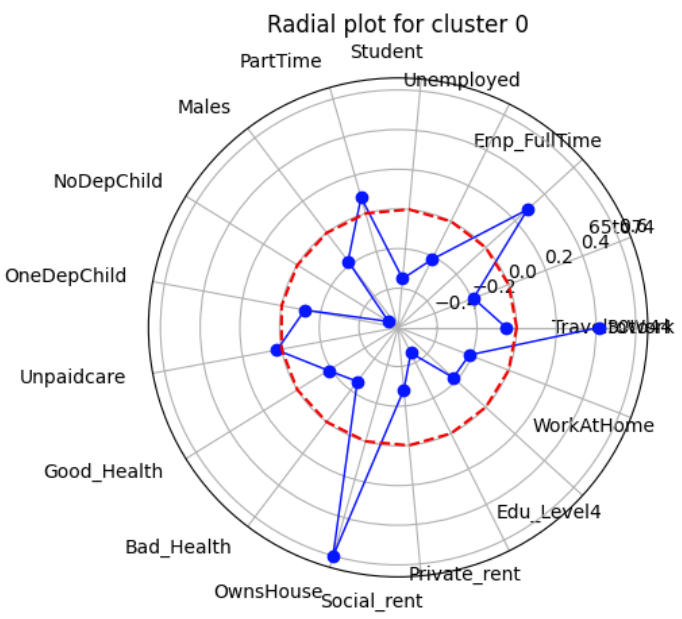

**Cluster 1**

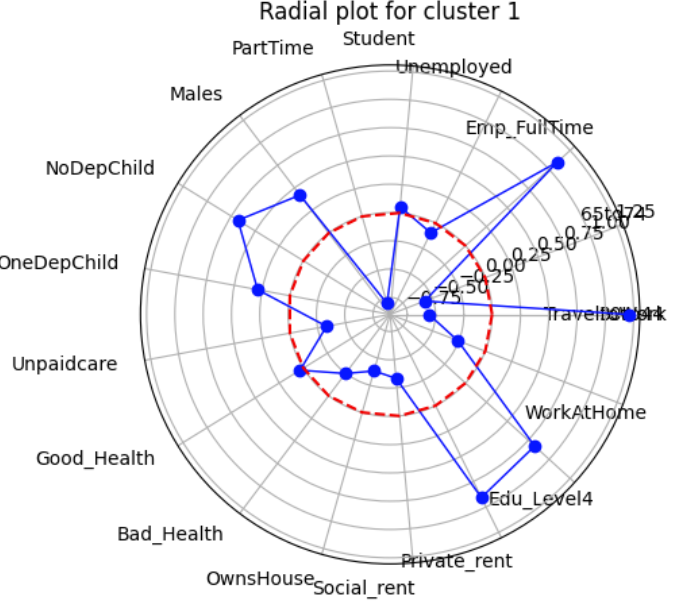

**Cluster 2**

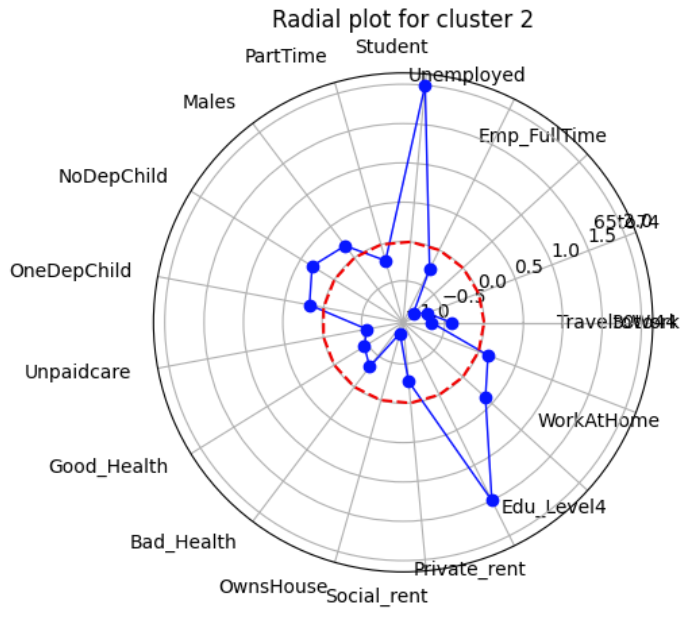

**Cluster 3**

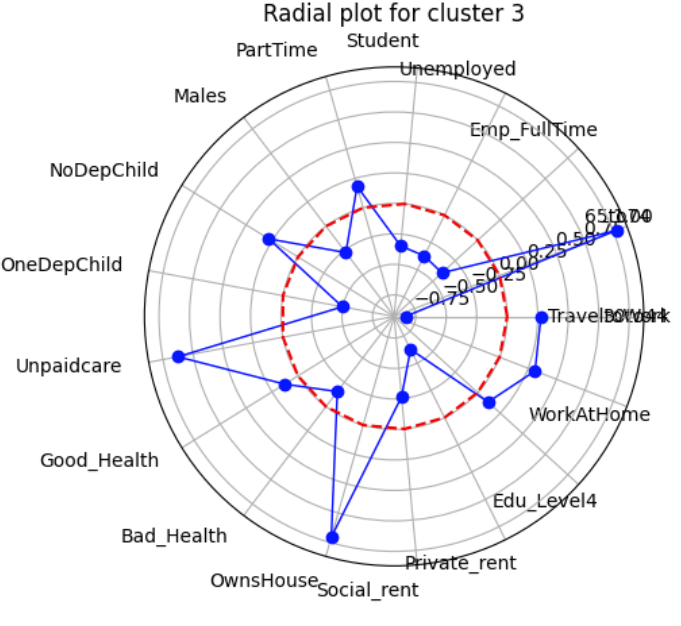

**Cluster 4**

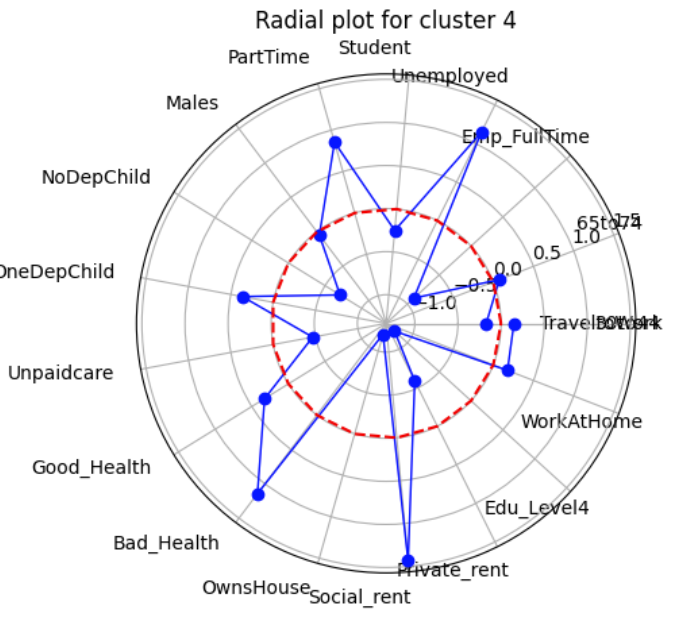

### Cluster Characteristics

There are different characteristics of each radial plot and cluster. From looking at my cluster plots and also checking this with the dataframe I have determined that each cluster has the following characteristics. 

**Cluster 0**
* Neither 30-44 or 65-74
* Do not give unpaid care 
* Below average in 'no dependent children' so it is likely that they have some dependencies 
* They tend to be homeowners
* They travel to work more than work from home
* Almost average level of education when compared to the rest of the population
> Overall, they seem to be quite an average representation of the population, apart from they are definitely homeowners who travel to work and it is likely they have children that they have to look after.


**Cluster 1**
* Lots of people aged 30-44
* Many in full time employment
* Do not tend to have people dependent on them.
* More males
* Average health
* Private renters
* High Education level
> Seems to be younger workers who do not have people dependent on them yet, many are in full time employment and maybe have not settled down with a family yet.

**Cluster 2**
* Students
* Not in the two age categories, I imagine them to be younger than 30
* No people dependent on them
* Average health
* Private renters
* Above average education level
> I imagine this gorup to be younger students, who are renting as they may be at, or just finished university. This is why they have few people dependent on them and the overall education level of the population is still not above average, because they may not have finished thir higher education yet.

**Cluster 3**
* Older population
* No dependent children
* Quite good health
* Homeowners
* Just above average education level
* Provide a lot of unpaid care
> I imagine this group to be the older generation, who seem reasonably comfortable, as they now have no dependent children, are homeowners and in quite good health. They may provide unpaid care to grandchildren or their partners.

**Cluster 4**
* In neither age category
* Many are unemployed
* Lots of people in part time work
* Have dependent children
* Tend to have bad health
* More people are social renters
* They also have a low level of education
> This group seems to be more deprived group, who are looking for employment and doing lots of part time work. They may also be families with dependent children. They are social renters with low education. 

### Mapping the clusters
10. Map the final cluster groups

I am going to map the clusters to see how they look visually, I will then try and rename the clusters depending on their characteristics. 

In [ ]:
list(z_score_df.columns)

In [ ]:
z_score_df.drop(['30to44',
 '65to74',
 'Emp_FullTime',
 'Unemployed',
 'Student',
 'PartTime',
 'Males',
 'NoDepChild',
 'OneDepChild',
 'Unpaidcare',
 'Good_Health',
 'Bad_Health',
 'OwnsHouse',
 'Social_rent',
 'Private_rent',
 'Edu_Level4',
 'WorkAtHome',
 'TraveltoWork'], axis=1, inplace=True)
z_score_df.info()

In [ ]:
# Concatenate the resulting tables.
final_df = pd.concat([edin_census_data, z_score_df], axis=1, ignore_index=False)
final_df.head()

In [ ]:
final_df.explore(column='Cluster', cmap='Set1', tiles='CartoDB positron')

### Assigning Names to Clusters

11. Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.


I am now going to assign names to the different categories using help from the ONS pen portraits for 2011 OA classification.

[ONS Pen Portraits](https://webarchive.nationalarchives.gov.uk/ukgwa/20160105160709/http://www.ons.gov.uk/ons/guide-method/geography/products/area-classifications/ns-area-classifications/ns-2011-area-classifications/pen-portraits-and-radial-plots/pen-portraits-oa.pdf).

**Cluster 0 = Comfortable Cosmopolitan**
>This cluster seems associated with family living in houses that are owned. I expect they are a bit older than 44 and have older families.

**Cluster 1 = Urban Professionals**
>This cluster seems to be associated with people who are younger workers maybe in full time employment and have not got a family yet

**Cluster 2 = Inner City Students**
>This cluster seems as though they are Inner City Students, they are more likely to live in private rented accomodation and do not provide care for others. 

**Cluster 3 = Semi-detached ageing**
>Aging city dwellers are an older generation and can be homeowners, the map shows that they tend to live on the outskirts of the city.

**Cluster 4 = Industrious Hardship**
>This cluster seems as though they are more deprived and living in the inner city, they tend to be on social rented housing and have high levels of unemployment

The code below is a function to rename the clusters with the titles that I have assigned to them. There is obviously subjectivity to my interpretation of the groups, alongside the fact that there are many other variables that may have been important in defining these populations. 

In [ ]:
final_df.dtypes

I need to change Cluster to a string before renaming the columns 

In [ ]:
final_df.Cluster = final_df.Cluster.astype(str)
final_df.dtypes

In [ ]:
def rename_column(x): 
    x = x.replace("0", "Comforable Cosmopolitan")
    x = x.replace("1", "Urban Professionals")
    x = x.replace("2", "Inner City Students")
    x = x.replace("3", "Semi-detached ageing")
    x = x.replace("4", "Industrious Hardship")
    return x

final_df['Cluster'] = final_df['Cluster'].apply(rename_column)

In [ ]:
final_df.head()

Printing the final map with labels assigned to the clusters. 

In [ ]:
final_df.explore(column='Cluster', cmap='Set1', tiles='CartoDB positron')

12. Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal.

**Subjectivity of Geodemographic Classification**

Throughout my code for this challenge, I have shown areas where it is important to observe the subjective nature of geodemographic classification. On a few occasions, I have made decisions that will have definitely affected the final map. Each time I have made one of these decisions I have explained my reasoning behind taking a certain step. In my opinion, the main times where the classification was subjective, was the initial picking of variables. Where in my choosing of variables of certain ages, or students, type of tenure etc. it means that in the end these classifications will be shown, rather than the type of industry that people work in. Other subjective decisions were; choosing the level of collinearity at which to remove a variable, the number of categories and the names of the categories. For these decisions, I have documented throughout my rationale behind making the decisions. 

**Challenges and Insights Gained**

There were many challenges when conducting a geodemographic classification. I think the hardest challenge is to pick the multiple topcis at the start of the analysis. This is because there are so many different topics to pick from and each is similar, but slightly different to each other. Therefore, it was important to be careful when selecting the initial CSV's that would contribute to the analysis. Another insight, is that it is very useful to look at the correlation coefficients of each variable because sometimes variables that you think will be good at displaying differnent categories, are very related, and it would be better to have just one of those variables. For example, i thought having 'does not give unpaid care per week', and also 'gives 0-19 hours of unpaid care per week' would be good. However actually, they are highly correlated and it is more useful just to have one of these variables. Another challenge was using the KMeans classification. This is becuase it was hard to pick between using 5 or 6 categories, due to the elbow graph being slightly vague. However I found it useful to use other information to help make my decision, and since 5 categories explained more variance in the data it was better to use that. Another challenge and insight was that the KMeans distribute the cluster centres slightly differently each time it was run. Therefore making the radial plots was tricky to do where it would be reproducable. This is becuase I wanted to make 5 radial plots with titles for each cluster. But since it is run differently each time, this is very hard to do. That is why there are screenshots of each cluster and a dataframe in the form of a csv, so that if anyone wanted to reproduce the radial plots in the screenshots, they would be able to. A final insight, is that it is not easy to name and categorise people of a whole city into just 5 categories. This is because there are so many different variables and people living different lives that it is makes this analysis quite complicated. One benefit of this type of analysis is that it offers a great way to clearly allocate service provisions and know surface level stats about a place. However if you wanted to know more information about the city of Edinburgh, there would be further analysis necessary. 

I think the main challenge of this coding section was that it is very hard to make the code reproducable, since there are small changes each time using KMeans, this means that some of the analysis that I have made may be different to when someone else runs the code. 

**Potential use cases for the geodemographic classification**

The geodemographic classification aimed to show different distribution socio-demogrpahic and economic clusters around the City of Edinburgh, focussing on various characteristics. These were housing, education, age, provision of care to others, economic factors such as employment, work type and travel to work. 

This geo-demographic classification has shown that there are areas in Edinburgh that need some extra service allocation. For example, the number of healthcare centres or hospitals may need to be checked in the areas of 'industrious hardship' and 'semi-detached ageing'. The people in industrious hardship category had quite bad health compared to the rest of the population, and although the population in the semi detached ageing had ok health, it is likely that this may deteriorate due to their age. Another example is the identification of inner city students, this could help the provision of sports resources to encourage young people to get out and improve their quality of life. It could also help retail planners in the design of their houses and encourage people in that area to privately rent their houses rather than sell them. On the other hand, housing retailers could encourage the sale of more houses in the comfortable cosmopolitan categories. Since these people generally own their houses. 

I think the most important potential use is the identification of those in the industrial hardship category. This group had by far the worst health, higher unemployment, in part time work and in social rent. Therefore there could be job training programmes or job agencies in the area. There could also be more affordable products here so that people could afford food and essentials for a cheaper price. 


**FINAL MAP**

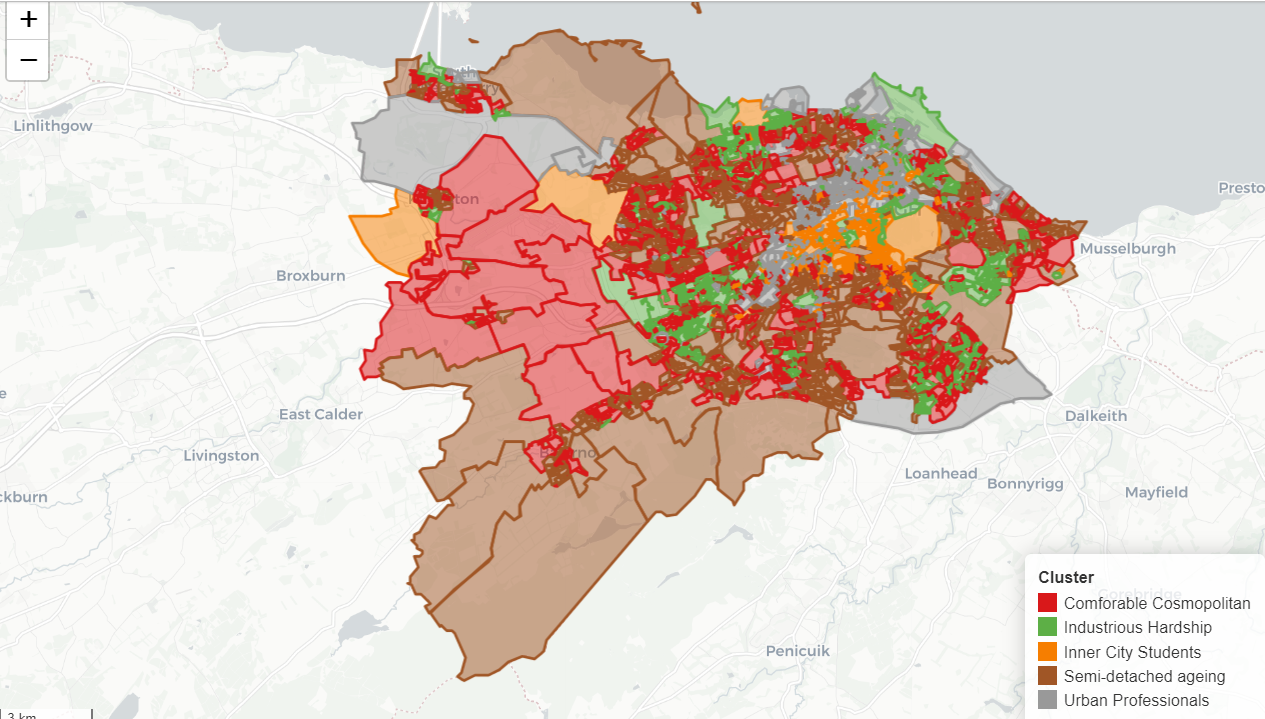